# Fig. 2. Data sources presented as a treemap chart, weighted according to their contribution to the project entity. 

#### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter

def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.replace(np.nan, '-', regex=True)
    
    
    return filtered_df

#### Define projects data path and number of projects to print

In [2]:
file_path = "data/mapeo_proyectos.csv"

#### Define function to clean projects data

In [3]:
def prepare_data(data, num_of_sources): 
    mini = proyectos[["ID proyecto","Fuente de información"]] 
    mini = mini.groupby('ID proyecto')["Fuente de información"].apply(list).reset_index(name='Fuente de información')
    mini = mini["Fuente de información"]
    # mini
    sources_list = mini.tolist()
    def_list = []
    for sources in sources_list:
        item = sources[0]
        if "," in item:
            comas = item.split(", ")
            for element in comas:
                def_list.append(element.strip())
        else: 
            def_list.append(item.strip())
    counter = Counter(def_list).most_common(num_of_sources)
    sources_dict = dict(counter)
    acronimos = pd.read_csv("data/fuentes.csv", sep=";")
    acronimos = acronimos.set_index('Fuente de información')
    acronimos_dict = acronimos.T.to_dict('records')
    acronimos_dict = acronimos_dict[0]
    # new dict with acronims
    corrected_dict = {}
    for key, value in sources_dict.items():
        corrected_dict.update({ acronimos_dict.get(key, "Vacío"): value })  
    return corrected_dict, sources_dict

#### Run program
## Change 'num_of_sources' to show as many disciplinary backgrounds as you want'

In [4]:
num_of_sources = 10
proyectos = read_csv(file_path)    
corrected_dict, sources_dict = prepare_data(proyectos, num_of_sources)

# Print treemap

In [5]:
import squarify


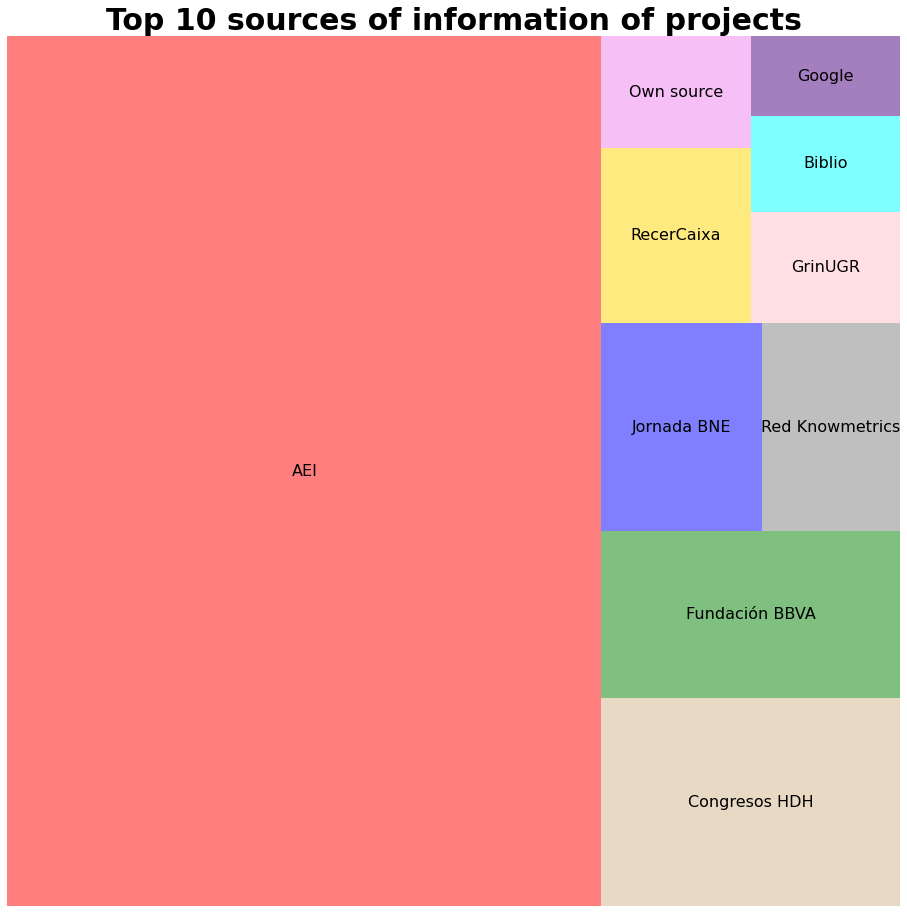

In [6]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
colors = ["red", "tan", "green", "blue", "grey", "gold", "violet", "pink", "cyan", "indigo"]
squarify.plot(sizes=corrected_dict.values(), label=corrected_dict.keys(), color=colors, alpha=.5, text_kwargs={'fontsize':16})
plt.title("Top 10 sources of information of projects",fontsize=30,fontweight="bold")

plt.axis('off')
plt.show() 

# Print table

In [7]:
sources_table = pd.DataFrame.from_dict(sources_dict, orient='index')
sources_table

,0
Agencia Estatal de Investigación,217
Congresos HDH,26
Fundación BBVA,21
Jornada Proyectos de Humanidades Digitales Biblioteca Nacional de España,14
Red Knowmetrics,12
RecerCaixa,11
Fuente propia,7
GrinUGR,7
Bibliografía,6
Google,5
